<a href="https://colab.research.google.com/github/Nsingh321/Machine-Learning/blob/main/simpsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install caer canaro

In [ ]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc

In [ ]:
# all the images have to be of same size before we can feed them to the model
IMG_SIZE = (80,80)
channels = 1       #gray scale
char_path = r'/content/drive/MyDrive/Deep Learning/simpsons_dataset'

In [ ]:
# grab the top 10 characters which has the most no. of images of that class
# create empty dictionary
char_dict = {}

for char in os.listdir(char_path):
  specific_folder_path = os.path.join(char_path,char)

  # take the length of all the images and store in dictionary(char_dict) with name of folder(char)
  char_dict[char] = len(os.listdir(specific_folder_path))

print(char_dict)
print('\n')
# sort the dictionary in descending order so that we get the top 10 folders with most no of images
char_dict = caer.sort_dict(char_dict,descending=True)
char_dict

{'carl_carlson': 108, 'chief_wiggum': 986, 'bart_simpson': 1342, 'barney_gumble': 106, 'apu_nahasapeemapetilon': 623, 'agnes_skinner': 42, 'abraham_grampa_simpson': 913, 'bumblebee_man': 0, 'charles_montgomery_burns': 1193, 'cletus_spuckler': 47, 'gil': 27, 'fat_tony': 27, 'jasper_beardly': 0, 'edna_krabappel': 457, 'homer_simpson': 2246, 'comic_book_guy': 469, 'hans_moleman': 0, 'groundskeeper_willie': 131, 'disco_stu': 8, 'helen_lovejoy': 0, 'lisa_simpson': 1364, 'krusty_the_clown': 1206, 'martin_prince': 71, 'lenny_leonard': 310, 'marge_simpson': 1291, 'mayor_quimby': 246, 'maggie_simpson': 128, 'jimbo_jones': 0, 'lionel_hutz': 3, 'kent_brockman': 498, 'otto_mann': 32, 'rainier_wolfcastle': 45, 'ned_flanders': 1454, 'principal_skinner': 1194, 'miss_hoover': 17, 'milhouse_van_houten': 1079, 'moe_szyslak': 1452, 'professor_john_frink': 65, 'nelson_muntz': 359, 'patty_bouvier': 72, 'troy_mcclure': 8, 'selma_bouvier': 103, 'sideshow_bob': 877, 'snake_jailbird': 55, 'waylon_smithers': 18

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1364),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 359),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('groundskeeper_willie', 131),
 ('maggie_simpson', 128),
 ('carl_carlson', 108),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('gil', 27),
 ('fat_tony', 27),
 ('miss_hoover

In [ ]:
# grab the name of first 10 names of characters from the dictionary and store in list
characters = []
count = 0
for i in char_dict:
  characters.append(i[0])
  count = count+1
  if count >=10:
    break

print(characters)

['homer_simpson', 'ned_flanders', 'moe_szyslak', 'lisa_simpson', 'bart_simpson', 'marge_simpson', 'krusty_the_clown', 'principal_skinner', 'charles_montgomery_burns', 'milhouse_van_houten']


In [ ]:
# create the training data
train = caer.preprocess.preprocess_from_dir(DIR=char_path,classes=characters,IMG_SIZE=IMG_SIZE,channels=channels,isShuffle=True)
# it will see the characters list and then go to all those folders which are in characters 
# and add all the images of that folder to the training set
# a training set is a list of list .eg. So inside the list, it has a list with image and its labels. And like this there are lots of lists.

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.029474258422851562s
[INFO] At 1000 files
[INFO] 1454 files found in 0.022734403610229492s
[INFO] At 1000 files
[INFO] 1452 files found in 0.02499985694885254s
[INFO] At 1000 files
[INFO] 1364 files found in 0.021100521087646484s
[INFO] At 1000 files
[INFO] 1342 files found in 0.034868478775024414s
[INFO] At 1000 files
[INFO] 1291 files found in 0.021685361862182617s
[INFO] At 1000 files
[INFO] 1206 files found in 0.020893096923828125s
[INFO] At 1000 files
[INFO] 1194 files found in 0.03127098083496094s
[INFO] At 1000 files
[INFO] 1193 files found in 0.0206754207611084s
[INFO] At 1000 files
[INFO] 1079 files found in 0.01934957504272461s
----------------------------------------------
[INFO] 13821 files preprocessed! Took 1m 27s


In [ ]:
# check the no. of images in the training set
len(train)

13821

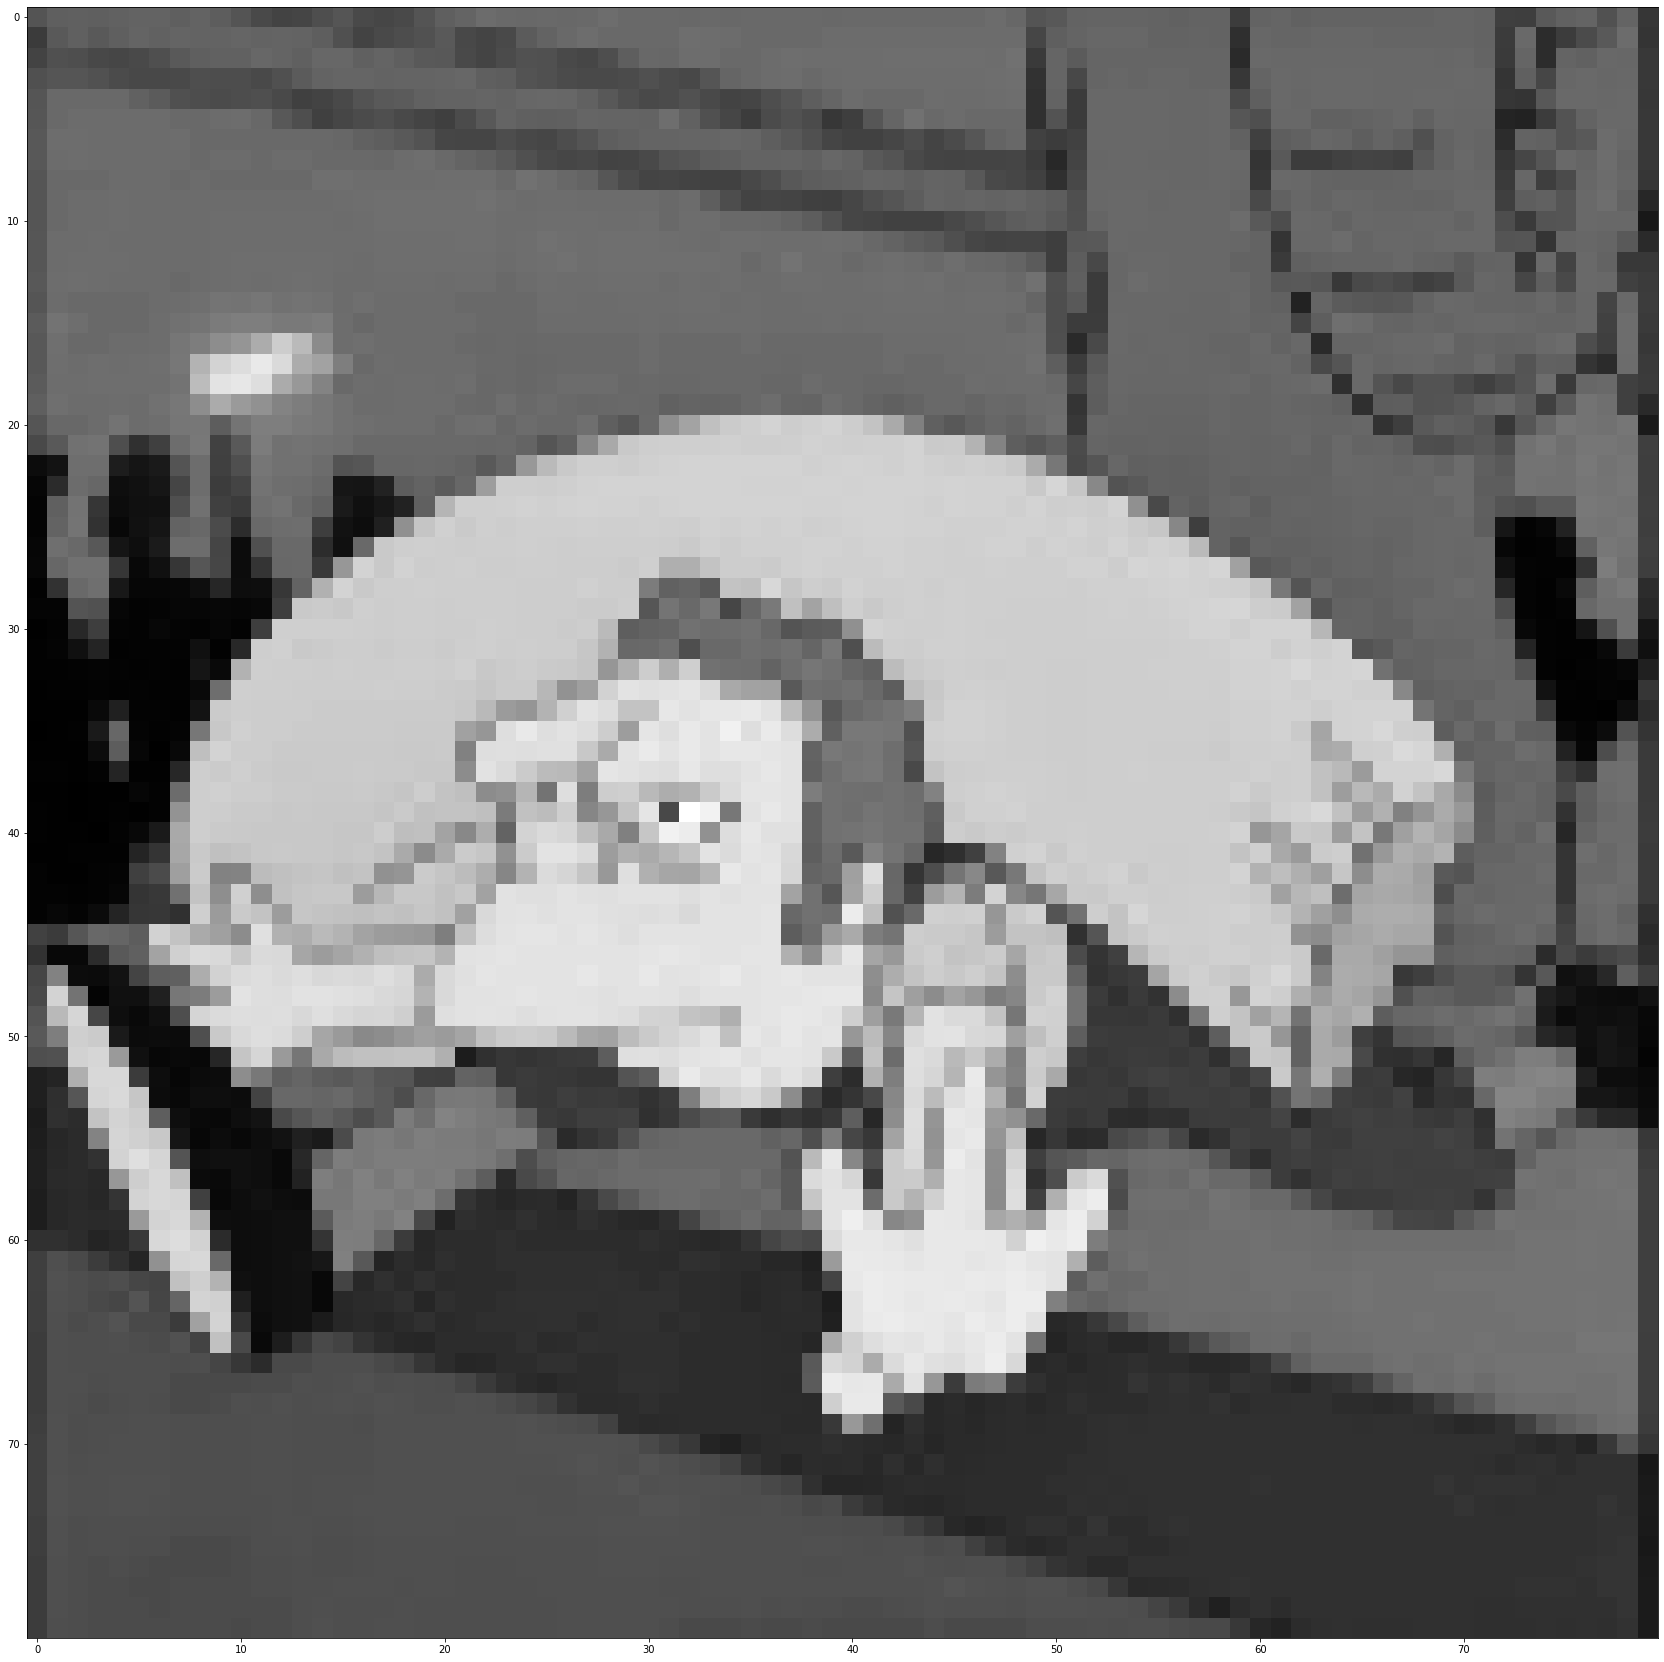

In [ ]:
# visualize the image
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [ ]:
# seperate the training set(13188 lists inside it) into features and labels
# inside a particular list it has 2 elements -> the array(image) and the label

# seperate the arrays and labels into seperate lists
# also reshape the feature set into 4D tensor so that it can be into the model with no restrictions
featureSet , labels = caer.sep_train(data=train,IMG_SIZE=IMG_SIZE)

In [ ]:
# normalize the feature set(range -> 0,1) so that the network will be able to learn the features much faster
featureSet = caer.normalize(x=featureSet)


# conver the labels using One Hot Encoding
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels,len(characters))


In [ ]:
# training and validation data
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)


In [ ]:
# to save memory delete the variables that we are not using
del train
del featureSet
del labels
gc.collect()

50

In [ ]:
# image data generator -> image generator that will essentially synthesize new images from already existing images to help introduce 
# some randomness to our network and make it perform better

BATCH_SIZE = 32
EPOCHS = 10

# instantiate image generator from the keras library
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)



In [ ]:
# creating the model
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE,channels=channels,output_dim=len(characters),
                                          loss='binary_crossentropy',decay=1e-6,learning_rate=0.001,
                                          momentum=0.9,nesterov=True
                                          )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 80, 80, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 78, 78, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 39, 39, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 39, 39, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 39, 39, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 37, 37, 64)        36928     
                                                      

In [ ]:
from tensorflow.keras.callbacks import LearningRateScheduler

# callbacks list - schedule the learning rate so that our network can train better
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [ ]:
# train the model
training = model.fit(train_gen,
                     steps_per_epoch=len(x_train) // BATCH_SIZE,
                     epochs = EPOCHS,
                     validation_data = (x_val,y_val),
                     validation_steps = len(y_val) //BATCH_SIZE,
                     callbacks = callbacks_list
                     )

Epoch 1/10
345/345 [==============================] - 13s 39ms/step - loss: 0.2939 - accuracy: 0.2923 - val_loss: 0.2873 - val_accuracy: 0.3467 - lr: 0.0100
Epoch 2/10
345/345 [==============================] - 11s 30ms/step - loss: 0.2913 - accuracy: 0.3046 - lr: 0.0100
Epoch 3/10
345/345 [==============================] - 11s 30ms/step - loss: 0.2892 - accuracy: 0.3113 - lr: 0.0100
Epoch 4/10
345/345 [==============================] - 11s 32ms/step - loss: 0.2852 - accuracy: 0.3260 - lr: 0.0100
Epoch 5/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2816 - accuracy: 0.3409 - lr: 0.0100
Epoch 6/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2774 - accuracy: 0.3535 - lr: 0.0100
Epoch 7/10
345/345 [==============================] - 11s 31ms/step - loss: 0.2731 - accuracy: 0.3683 - lr: 0.0100
Epoch 8/10
345/345 [==============================] - 10s 30ms/step - loss: 0.2677 - accuracy: 0.3843 - lr: 0.0100
Epoch 9/10
345/345 [==================

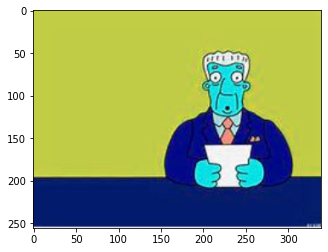

In [ ]:
# use openCV to read and image and test our model
# test_path = r'../input/the-simpsons-characters-dataset/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_18.jpg'
test_path = r'/content/drive/MyDrive/Deep Learning/simpsons_dataset/kent_brockman/pic_0004.jpg'
img = cv.imread(test_path)
plt.imshow(img)
plt.show()

# this function will shape the image to the same size as we did at the time to train the model
def perpare(img):
  img = cv.cvtColor(img,cv.COLOR_BGR2GRAY) #to gray scale
  img = cv.resize(img,IMG_SIZE)            #to(80,80) image
  img = caer.reshape(img,IMG_SIZE,1)       #to 1 channel (array)
  return img

In [ ]:
predictions = model.predict(perpare(img))

In [ ]:
print(characters[np.argmax(predictions[0])])

lisa_simpson


In [ ]:
import tensorflow as tf

device_list = tf.test.gpu_device_name()

In [ ]:
device_list

'/device:GPU:0'